In [1]:
#Importing and Data Cleaning
import pandas as pd 
import numpy as np


imp = pd.read_csv('56-malaysias-import-sources.csv', encoding = 'iso-8859-1',header=2 , skipfooter=2)

imp.info()

imp.isnull().values.any()

imp[imp.isnull().any(axis=1)] #show rows with null values 

list(imp)


imp['Total\xa0Import (USD)'][0]


type(imp['Total\xa0Import (USD)'][0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 5 columns):
Year                  2571 non-null int64
Month                 2571 non-null int64
Country               2571 non-null object
Country Code          2559 non-null object
Total Import (USD)    2571 non-null object
dtypes: int64(2), object(3)
memory usage: 100.5+ KB


C:\Users\Tarek\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [41]:
imp['Total\xa0Import (USD)'][0]


type(imp['Total\xa0Import (USD)'][0])


KeyError: 'Total\xa0Import (USD)'

In [7]:
# rename columns
imp.columns = ['Year', 'Month', 'Country', 'Country Code', 'Import']
# replace \xa0
imp = imp.replace({'\xa0':" "}, regex=True)
# palcing NAM instead of NA
imp.loc[imp['Country'] == "NAMIBIA", 'Country Code'] = "NAM"
# convert strings into number 
imp["Import"] = imp['Import'].replace({',':''}, regex=True)
imp["Import"] = imp['Import'].apply(int)

In [8]:
imp.head()

,Year,Month,Country,Country Code,Import
0,2016,1,AFGHANISTAN,AF,10609
1,2016,1,ALBANIA,AL,7947
2,2016,1,ALGERIA,DZ,0
3,2016,1,AMERICAN SAMOA,AS,0
4,2016,1,ANDORRA,AD,0


In [9]:
imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 5 columns):
Year            2571 non-null int64
Month           2571 non-null int64
Country         2571 non-null object
Country Code    2571 non-null object
Import          2571 non-null int64
dtypes: int64(3), object(2)
memory usage: 100.5+ KB


In [20]:
exp = pd.read_csv('55-malaysias-export-destination.csv', encoding = 'iso-8859-1',header=2 , skipfooter=2)

C:\Users\Tarek\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [21]:
exp.head()

,Year,Month,Country,Country Code,Total Export (USD)
0,2016,1,AFGHANISTAN,AF,"6,533,359"
1,2016,1,ALBANIA,AL,"95,077"
2,2016,1,ALGERIA,DZ,"11,758,400"
3,2016,1,AMERICAN SAMOA,AS,"39,681"
4,2016,1,ANDORRA,AD,"72,293"


In [23]:
# rename columns
exp.columns = ['Year', 'Month', 'Country', 'Country Code', 'Export']
# replace \xa0
exp = exp.replace({'\xa0':" "}, regex=True)
# palcing NAM instead of NA
exp.loc[exp['Country'] == "NAMIBIA", 'Country Code'] = "NAM"
# convert strings into number 
exp["Export"] = exp['Export'].replace({',':''}, regex=True)
exp["Export"] = exp['Export'].apply(int)

In [24]:
len(imp)

2571

In [25]:
col_exp = ['Month','Country','Export']

In [26]:
col_exp

['Month', 'Country', 'Export']

In [27]:
slim_exp = exp[col_exp]

In [28]:
slim_exp

,Month,Country,Export
0,1,AFGHANISTAN,6533359
1,1,ALBANIA,95077
2,1,ALGERIA,11758400
3,1,AMERICAN SAMOA,39681
4,1,ANDORRA,72293
5,1,ANGOLA,8731875
6,1,ANGUILLA,4578
7,1,ANTIGUA & BARBUDA,399412
8,1,ARGENTINA,12524335
9,1,ARMENIA,195464


In [35]:
col_imp = ['Import']
col_imp

['Import']

In [36]:
slim_imp = imp[col_imp]
slim_imp

,Import
0,10609
1,7947
2,0
3,0
4,0
5,290967
6,0
7,0
8,43458878
9,0


In [37]:
pd.merge(slim_exp, slim_imp, how = "inner", left_index=True, right_index=True)

,Month,Country,Export,Import
0,1,AFGHANISTAN,6533359,10609
1,1,ALBANIA,95077,7947
2,1,ALGERIA,11758400,0
3,1,AMERICAN SAMOA,39681,0
4,1,ANDORRA,72293,0
5,1,ANGOLA,8731875,290967
6,1,ANGUILLA,4578,0
7,1,ANTIGUA & BARBUDA,399412,0
8,1,ARGENTINA,12524335,43458878
9,1,ARMENIA,195464,0


In [38]:
exp_imp = pd.merge(slim_exp, slim_imp, how = "inner", left_index= True, right_index=True)
exp_imp.tail()

,Month,Country,Export,Import
2566,12,VANUATU,324606,307618
2567,12,VENEZUELA,470352,22124814
2568,12,WESTERN SAMOA,319444,0
2569,12,ZAMBIA,271947,862212
2570,12,ZIMBABWE,619407,143476


In [39]:
exp_imp['BOT'] = exp_imp['Export'] - exp_imp["Import"]

In [40]:
exp_imp.tail()

,Month,Country,Export,Import,BOT
2566,12,VANUATU,324606,307618,16988
2567,12,VENEZUELA,470352,22124814,-21654462
2568,12,WESTERN SAMOA,319444,0,319444
2569,12,ZAMBIA,271947,862212,-590265
2570,12,ZIMBABWE,619407,143476,475931


In [42]:
exp_imp.loc[exp_imp['BOT'].idxmax()]

Month                         12
Country    REPUBLIC OF SINGAPORE
Export                2452499982
Import                1376037879
BOT                   1076462103
Name: 2518, dtype: object

In [43]:
exp_imp.loc[exp_imp['BOT'].idxmin()]

Month                               6
Country    PEOPLE'S REPUBLIC OF CHINA
Export                     1881793225
Import                     3236289669
BOT                       -1354496444
Name: 1227, dtype: object

In [44]:
exp_imp['BOT'].idxmin()

1227

In [48]:
import matplotlib.pyplot as plt
singapore = exp_imp[exp_imp['Country']== "REPUBLIC OF SINGAPORE"]

In [49]:
singapore

,Month,Country,Export,Import,BOT
156,1,REPUBLIC OF SINGAPORE,2070221203,1507449808,562771395
371,2,REPUBLIC OF SINGAPORE,1897714235,1273649128,624065107
588,3,REPUBLIC OF SINGAPORE,2287069501,1376944507,910124994
804,4,REPUBLIC OF SINGAPORE,2343151544,1388198618,954952926
1022,5,REPUBLIC OF SINGAPORE,2098509151,1372566851,725942300
1237,6,REPUBLIC OF SINGAPORE,2408595392,1665229749,743365643
1451,7,REPUBLIC OF SINGAPORE,2277493759,1456698375,820795384
1663,8,REPUBLIC OF SINGAPORE,2486442274,1466175375,1020266899
1875,9,REPUBLIC OF SINGAPORE,2533374249,1529666433,1003707816
2090,10,REPUBLIC OF SINGAPORE,2323560095,1596099550,727460545


In [50]:
Months = singapore["Month"].values

In [51]:
Months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [84]:
sing_exp = singapore['Export']
sing_imp = singapore['Import']


In [85]:
sing_exp

156     2070221203
371     1897714235
588     2287069501
804     2343151544
1022    2098509151
1237    2408595392
1451    2277493759
1663    2486442274
1875    2533374249
2090    2323560095
2304    2413097382
2518    2452499982
Name: Export, dtype: int64

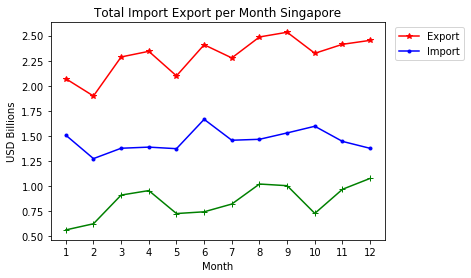

In [86]:
###############
sing_bot = singapore['BOT'].values
plt.plot(Months, sing_bot/1e9, 'g+-') # shift tab to see details 
################

plt.plot(Months, sing_exp/1e9, 'r*-') # shift tab to see details 
plt.plot(Months, sing_imp/1e9, 'b.-')

xticks = [Months]

plt.xticks(Months)

plt.legend(loc=1 , bbox_to_anchor=(1.25, 1))
plt.xlabel('Month')
plt.ylabel("USD Billions")
plt.title('Total Import Export per Month Singapore')
sing_exp = singapore['Export'].values
sing_imp = singapore['Import'].values
plt.show()
